In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pointbiserialr

In [122]:
df_2019 = pd.read_csv('./dataset/FoodAccessResearchAtlasData2019.csv')




In [123]:
temp = df_2019.groupby("LILATracts_1And10")

low_access = df_2019[df_2019['LILATracts_1And10'] == 1]
high_access = df_2019[df_2019['LILATracts_1And10'] == 0]


ttest_ind(low_access['Pop2010'], high_access['Pop2010'])

# sns.barplot(x=temp.index, y=temp.values)

TtestResult(statistic=np.float64(-2.7428811465067984), pvalue=np.float64(0.006091767080788188), df=np.float64(72529.0))

In [132]:
df_2019.head()
df_2019["County"] = [s.replace(" County", "") for s in df_2019["County"]]
df_2019

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie,0,3326,1317,0,57.0,1.71,0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie,1,2665,1154,0,10.0,0.38,0,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie,1,2542,1021,0,73.0,2.87,0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston,0,3314,1322,0,252.0,7.60,0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


In [41]:
df_2019.groupby("LILATracts_1And10")["PovertyRate"].mean()


LILATracts_1And10
0    1615.710255
1    1565.017755
Name: OHU2010, dtype: float64

<Axes: xlabel='OHU2010', ylabel='MedianFamilyIncome'>

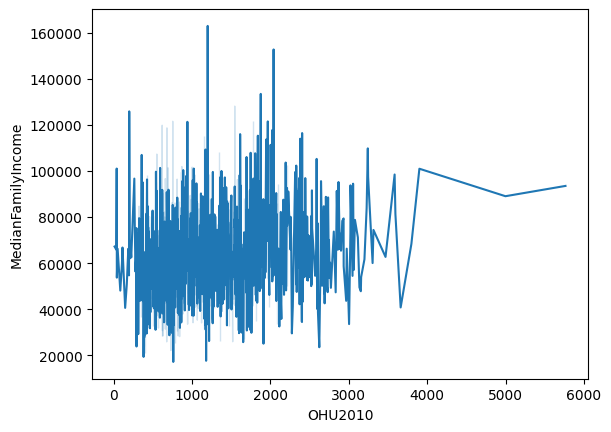

In [61]:
sns.lineplot(x=df_2019["OHU2010"], y=df_2019["MedianFamilyIncome"])

In [128]:
cols = ['LILATracts_1And10', 'PovertyRate', 'MedianFamilyIncome', 'Pop2010', "OHU2010", "Urban", "TractHUNV", "TractBlack", "TractLOWI", "TractSNAP"]

processed = df_2019[cols].dropna(subset=cols)
X = processed.drop(columns=['LILATracts_1And10'])
y = processed['LILATracts_1And10']
processed.shape


(71782, 10)

0.8754614473775858

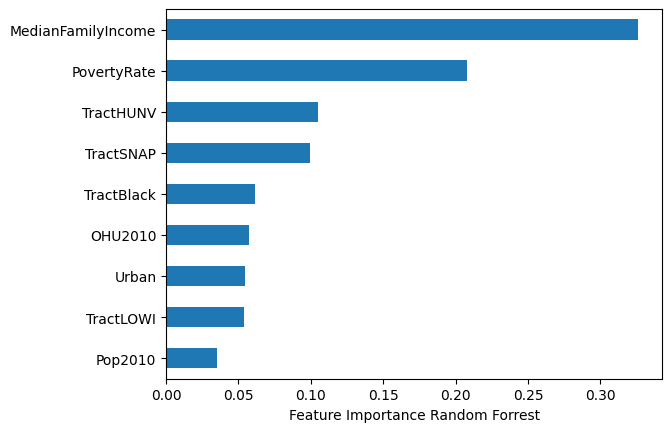

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=0)

rf.fit(X_train, y_train)

pd.Series(rf.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.xlabel("Feature Importance Random Forrest")
rf.score(X_test, y_test)
